In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.X = X
        self.labels = [0]*len(X)
        self.cluster = 0

        for i in range(len(X)):
            if self.labels[i] != 0:
                continue
            neighbors = self.get_neighbors(i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1
            else:
                self.cluster += 1
                self.expand_cluster(i, neighbors, self.cluster)
        return self.labels

    def get_neighbors(self, i):
        neighbors = []
        for j in range(len(self.X)):
            if np.linalg.norm(self.X[i] - self.X[j]) < self.eps:
                neighbors.append(j)
        return neighbors

    def expand_cluster(self, i, neighbors, cluster):
        self.labels[i] = cluster
        for j in neighbors:
            if self.labels[j] == -1:
                self.labels[j] = cluster
            elif self.labels[j] == 0:
                self.labels[j] = cluster
                new_neighbors = self.get_neighbors(j)
                if len(new_neighbors) >= self.min_samples:
                    neighbors += new_neighbors


In [6]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)


In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit(X)
df['cluster'] = labels


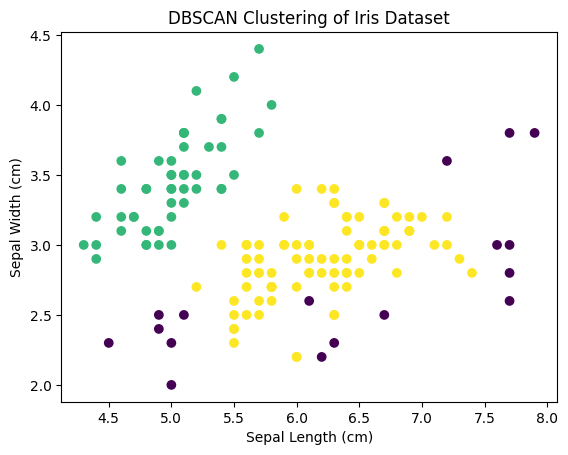

In [8]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()
